<a href="https://colab.research.google.com/github/maeliech/BigDataPhysics/blob/main/week6_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fish = pd.read_csv('/content/fish.txt', sep='\t') #renaming columns and separating them using the space character
fish

In [ ]:
print(fish.isna().sum())

Code_ID            0
Stream             0
Location           0
Family             0
Genus              0
Species            0
Scientific_name    0
Length_mm          0
Mass_g             0
dtype: int64


We check the values are ok

In [ ]:
weight = fish['Mass_g']
length = fish['Length_mm']

In [ ]:
#ln:
a = np.log10(weight)
b = np.log10(length)
M = a+b

We compute the logarithms of the weight and length

In [ ]:
array=[]
def fun(x):
  return a + b*x

for i in range(10):
  array.append(fun(i))

#plt.plot(array)

In [ ]:
slope=(np.mean(a*b)-np.mean(a)*np.mean(b))/np.std(a)**2
intercept=(np.mean(a*a)*np.mean(b)-np.mean(a*b)*np.mean(a))/np.std(a)**2
print(slope,intercept)

0.31215406974177434 1.6641423717371753


That means "partial derivative". You can differenciate E with respect to a and treat b as a constant. (E(a+da,b)-E(a,b))/da gives partial derivative with respect to the a, (E(a,b+db)-E(a,b))/db gives partial derivative with respect to the b

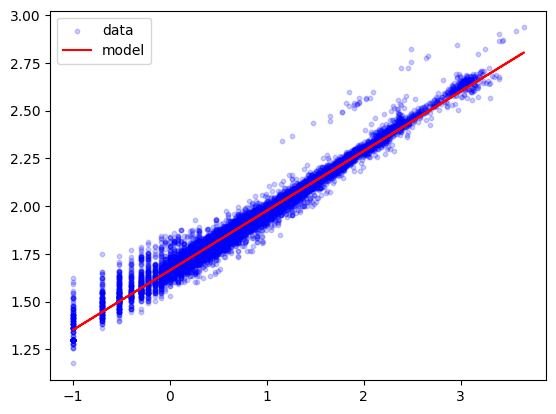

In [ ]:
model=lambda x:x*slope+intercept # defining linear model (you can also use def-return)

plt.scatter(x,y,label='data',s=10,alpha=0.2,c='b') # s: size, alpha: transparency, c=color
plt.plot(x,model(x),label='model',c='r')
plt.legend()

In [ ]:
from scipy.stats import linregress # scipy module
linregress(x,y)

LinregressResult(slope=0.31215406974177495, intercept=1.6641423717371753, rvalue=0.9862089334727002, pvalue=0.0, stderr=0.00047261359036380654, intercept_stderr=0.0005336345530059875)

In [ ]:
def MSE(x,y,slope,intercept):
  y_model=x*slope+intercept
  return np.mean((y-y_model)**2)

def dEda(x,y,slope,intercept,delta=0.0001):
  return (MSE(x,y,slope+delta/2,intercept)-MSE(x,y,slope-delta/2,intercept))/delta

def dEdb(x,y,slope,intercept,delta=0.0001):
  return (MSE(x,y,slope,intercept+delta/2)-MSE(x,y,slope,intercept-delta/2))/delta

def Gradient(x,y,epsilon=0.00001,c=0.02):
  slope,intercept=2,2
  slope_next,intercept_next=np.random.random(2)

  while abs(slope_next-slope)>epsilon or abs(intercept_next-intercept)>epsilon:
    slope,intercept = slope_next,intercept_next
    slope_next=slope - c*dEda(x,y,slope,intercept)
    intercept_next=intercept - c*dEdb(x,y,slope,intercept)
  return slope,intercept

In [ ]:
Gradient(x,y)

(0.31281976867469413, 1.6633544845066326)

The values obtained by different methods are very close.